In [2]:
from skimage.io import imsave, imread
import numpy as np
from skimage.color import rgb2gray
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt
import math as mt
%matplotlib inline

In [3]:
imagem = imread("IMD002.bmp")
alt,lar,dim = imagem.shape
ImgCinza = rgb2gray(imagem)

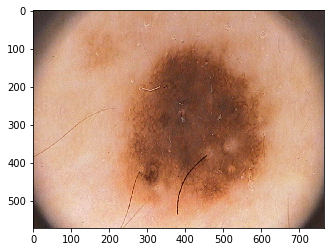

In [4]:
plt.imshow(imagem)

In [5]:
#Deixa a imagem mais clara
newImgCinza = rescale_intensity(ImgCinza)

In [6]:
#1 - Calculo do Gradiente de cada Pixel
imagem_copiaVert = newImgCinza.copy()
imagem_copiaHoriz = newImgCinza.copy()
imagem_total_g = newImgCinza.copy()

l,c = newImgCinza.shape
for i in range(1,l-1):
    for j in range(1,c-1):
        dx = newImgCinza[i+1,j] - newImgCinza[i-1, j]
        dy = newImgCinza[i,j+1] - newImgCinza[i, j-1]
        
        imagem_copiaVert[i,j] = dx
        imagem_copiaHoriz[i,j] = dy
        
for i in range(l):
    for j in range(c):
        g = mt.sqrt(pow(imagem_copiaVert[i,j],2)+pow(imagem_copiaHoriz[i,j],2))
        imagem_total_g[i,j] = g

#Fazer a alteração do tamanho das celulas
celula(imagem_total_g,80)

NameError: name 'celula' is not defined

imagem2 = imread("IMD002.bmp")
fig,ax = plt.subplots(1,2,figsize=(20,10),sharex = True)
ax[0].imshow(imagem)
ax[1].imshow(imagem2)

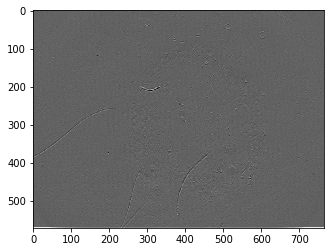

In [7]:
plt.imshow(imagem_copiaVert,cmap='gray')

In [ ]:
plt.imshow(imagem_copiaHoriz,cmap='gray')

In [ ]:
plt.imshow(imagem_total_g,cmap='gray')

In [8]:
#cálculodo gradiente em cada pixel
#agrupamento dos pixels em células
#agrupamento das células em blocos
#obtenção do descritor.
#função para recort das Células ainda sem funcionar

def celula(imagem,i):
    imagemRec = imagem[0:i, 0:i]
    
#for j in range(i,alt-i):
       # for k in range(i,lar-i):"""
            
                      

In [9]:
celula(imagem_total_g,8)

In [10]:
plt.imshow(imagemRec, cmap ="gray")

NameError: name 'imagemRec' is not defined

In [11]:
def bloco_celula(imagem_rec,i):
    for j in range(i,alt-i):
        for k in range(i,lar-i):
            imagemRec = imagem[alt-i:alt + i, lar-i:lar+i]

/home/arlaxad/.local/lib/python3.6/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


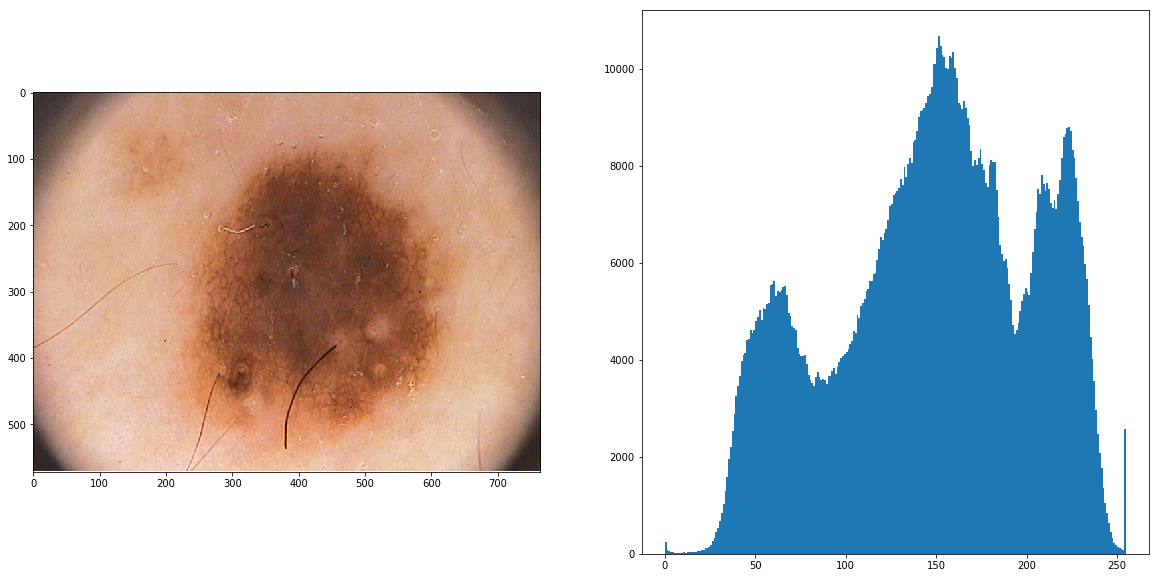

In [13]:
from skimage.exposure import histogram
hist = histogram(imagem,nbins=256)
fig,ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(imagem,cmap = "gray")
ax[1].hist(imagem.ravel(),range(256))
aux = hist = histogram(imagem,nbins=256)

In [28]:
import tensorflow as tf
block_hist = tf.extract_image_patches(imagem,
                                          ksizes  = [3,572,765,3], 
                                          strides = [3,572,765,3], 
                                          rates   = [3,1,1,1], 
                                          padding = 'VALID',
                                          name    = "BlockHist")
imagem = tf.nn.l2_normalize(imagem, 3, epsilon=1.0)

ValueError: Shape must be rank 4 but is rank 3 for 'BlockHist_6' (op: 'ExtractImagePatches') with input shapes: [572,765,3].

In [26]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale


hist.apply(scale)

AttributeError: 'tuple' object has no attribute 'apply'